# Medical Expenses Predictive modeling

Objective: The main objective of the the project to build predictive model to forecast medical expenses based on the feautures
    like age, sex, bmi, smoker, region, number of children etc. The charges is the target column, the regression algorithms 
    like random forest, linear regression, decision tree , k nearest neighbors were implemented and models are evaluated. The 
    significant features are selected using hypothesis test like kruskal wali, spearman correlation, shapiro etc. 

Details of the dataset

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance



### Importing relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics 
from scipy import stats

from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, ElasticNetCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
import scikit_posthocs as sp
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, KFold

In [2]:
data = pd.read_csv('expenses.csv') # Load the data

In [3]:
data.head() # data's glimpse

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape # data contains 7 attributes and 1338 records

(1338, 7)

In [5]:
data.describe() # five poin summary 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the summary it is clear that  none variable have zero standar deviation it means , all variables can be possible 
significant predictor to predict charges

The mean for age and 

In [68]:

print(f" kurtosis of charges = {data['charges'].kurt()}, skewness of charges = {data['charges'].skew()}")
print(f" kurtosis of bmi = {data['bmi'].kurt()}, skewness of bmi = {data['bmi'].skew()}")
print(f" kurtosis of age = {data['age'].kurt()}, skewness of age = {data['age'].skew()}")

 kurtosis of charges = 1.6062986532967907, skewness of charges = 1.5158796580240388
 kurtosis of bmi = -0.05073153135467834, skewness of bmi = 0.2840471105987448
 kurtosis of age = -1.2450876526418673, skewness of age = 0.05567251565299186


The above kurtosis and skweness conveys that

charges charges and bmi has positive kurtosis which means there tail of distribution are spreading less compare to normal curve 

All three variables are positively skewed. 
It means that mean of all three freatur is greather than median

In [9]:
data.select_dtypes(include = object).describe() # categorical columns details 

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


The contains three categorial features namely sex , smoker and region

the mode for sex is male, for smoker it is no and region has southeast, let's check the representation of this in the
data set

In [69]:
for col in  data.select_dtypes(include=object): # checking percentage of the values of categorica columns
    print(f'\n column name = {col}\n',data[col].value_counts()/len(data))


 column name = sex
 male      0.505232
female    0.494768
Name: sex, dtype: float64

 column name = smoker
 no     0.795217
yes    0.204783
Name: smoker, dtype: float64

 column name = region
 southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


The representation of each values in the categorical feature have mostly equal representation. The column smoker
contains 20 percent smoker while the rest are in non smoker category. It simply means that model that we will built
can be biased for the non smoker person

In [11]:
data.duplicated().sum() # there is only one duplicated value

1

In [12]:
data.isnull().sum() # There are no null values in the data set 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data visualization

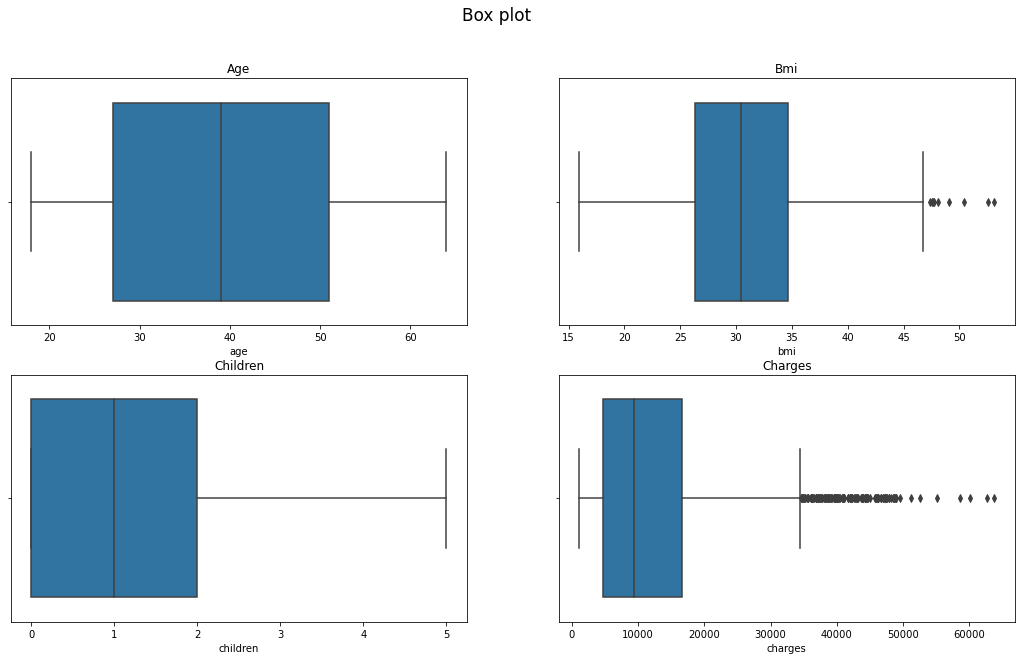

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Box plot', fontsize =17)
 
age = sns.boxplot(ax=axes[0, 0], data=data, x='age')
age.set_title('Age')
bmi = sns.boxplot(ax=axes[0, 1], data=data, x='bmi')
bmi.set_title('Bmi')
children = sns.boxplot(ax=axes[1, 0], data=data, x='children')
children.set_title('Children')
charges = sns.boxplot(ax=axes[1, 1], data=data, x='charges')
charges.set_title('Charges')
plt.show()

There is outliers present in the charges and bmi

The outliers in the bmi and charges present the extreme cases. The high bmi may be the cause high medical charges.
These plot raise many question like what cuase the high medical expenditure? Is high medical charges is directly linked to age or bmi of the person. Let's find the answer to these question with further exploration of the data. 

In [73]:

fig = px.scatter_3d(data, x='bmi', y='age', z='charges',
              color='smoker', title=' BMI vs AGE vs CHARGES VS SMOKER')

fig.show()

Analysing the 3 d plot with different agle makes it clear that the smoker person more likely to pay more charges

There is trend there if age and bmi increases medical charges increases

Pair Grid


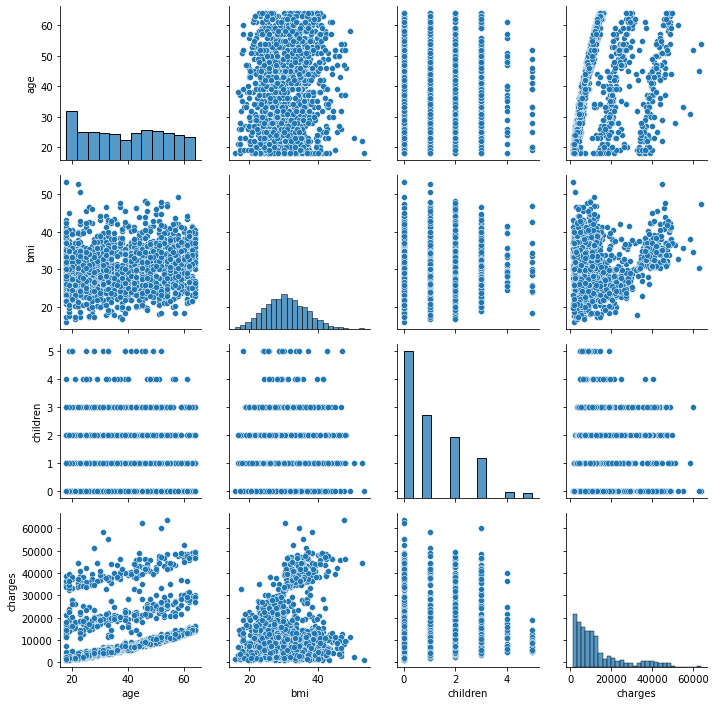

In [79]:
g = sns.PairGrid(data)
print('Pair Grid')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

It appear from the grid that  medical charges increases with age and bmi

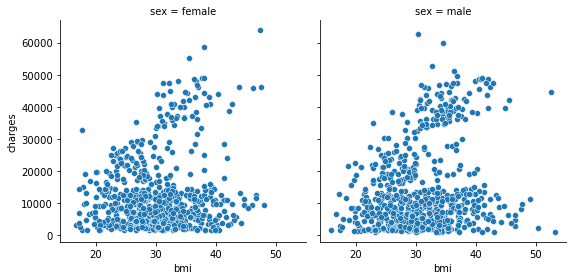

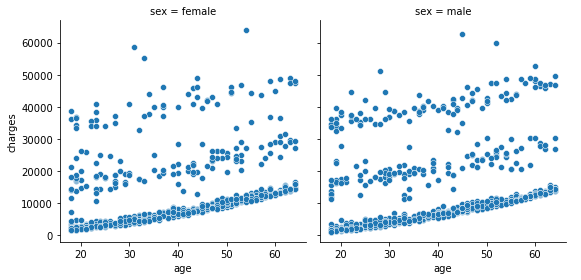

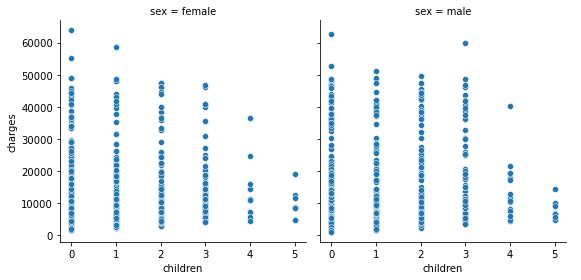

In [17]:

g1 = sns.FacetGrid(data, col="sex", height=4)
g2 = sns.FacetGrid(data, col="sex", height=4)
g3 = sns.FacetGrid(data, col ='sex', height=4)

g1.map(sns.scatterplot, "bmi", "charges")
g2.map(sns.scatterplot, "age", "charges")
g3.map(sns.scatterplot, "children", "charges")
g1.add_legend()
g2.add_legend()
g3.add_legend()
plt.show()

The plot for male and femail with pair like charges and children , charges and age, charges and bmi is similar

It means sex does not imacts the medical charges 

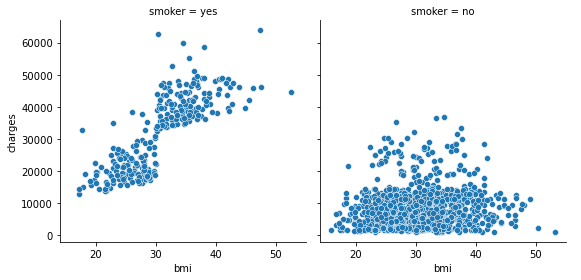

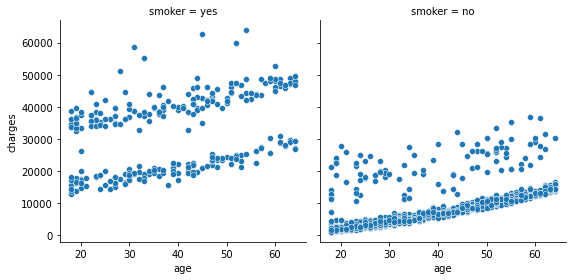

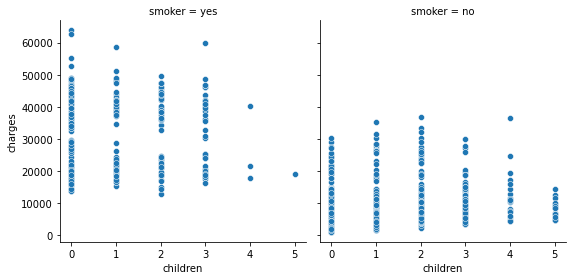

In [18]:
g1 = sns.FacetGrid(data, col="smoker", height=4)
g2 = sns.FacetGrid(data, col="smoker", height=4)
g3 = sns.FacetGrid(data, col ='smoker', height=4)

g1.map(sns.scatterplot, "bmi", "charges")
g2.map(sns.scatterplot, "age", "charges")
g3.map(sns.scatterplot, "children", "charges")
g1.add_legend()
g2.add_legend()
g3.add_legend()
plt.show()

From above graph we can see that smoker category likely to pay high medical charges, this is very clear from the above plot

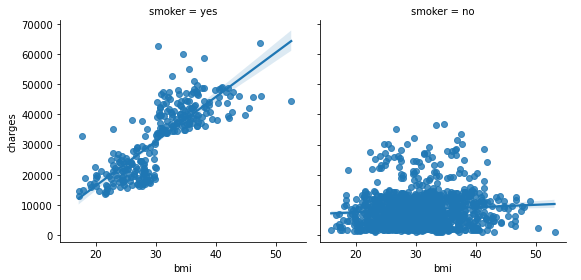

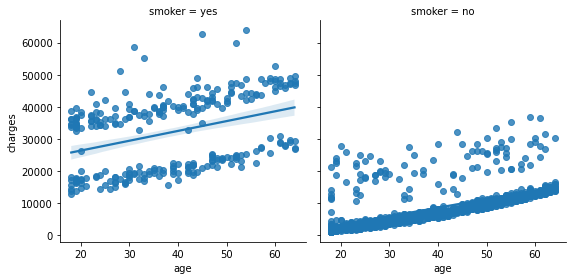

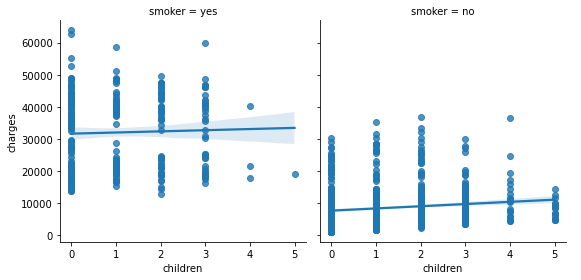

In [19]:
g1 = sns.FacetGrid(data, col="smoker", height=4)
g2 = sns.FacetGrid(data, col="smoker", height=4)
g3 = sns.FacetGrid(data, col ='smoker', height=4)

g1.map(sns.regplot, "bmi", "charges")
g2.map(sns.regplot, "age", "charges")
g3.map(sns.regplot, "children", "charges")
g1.add_legend()
g2.add_legend()
g3.add_legend()
plt.show()

The line shows increases trend of charges where smoker category have high slope as well as high intercept, clearly indicating
smoking increase medical charges

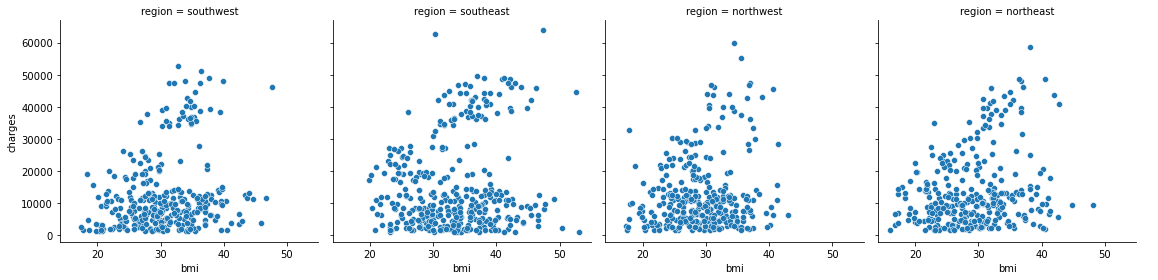

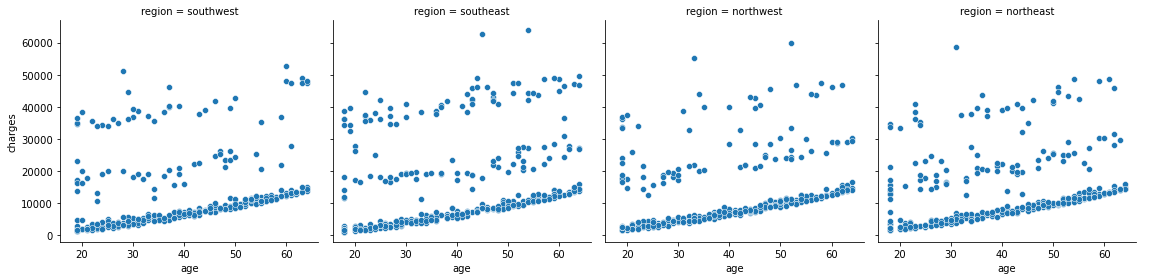

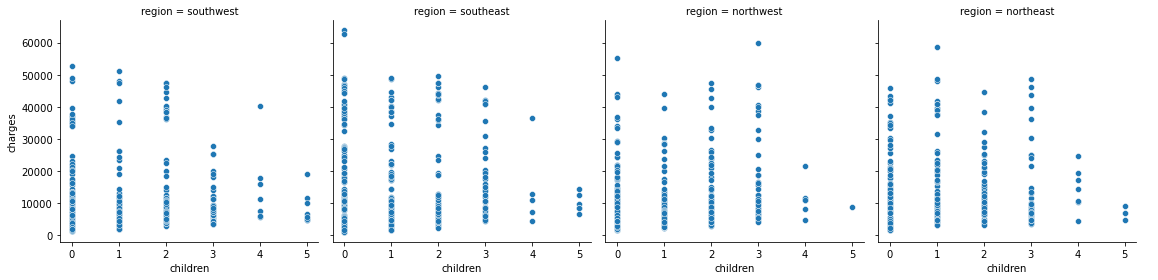

In [20]:
g1 = sns.FacetGrid(data, col="region", height=4)
g2 = sns.FacetGrid(data, col="region", height=4)
g3 = sns.FacetGrid(data, col ='region', height=4)

g1.map(sns.scatterplot, "bmi", "charges")
g2.map(sns.scatterplot, "age", "charges")
g3.map(sns.scatterplot, "children", "charges")
g1.add_legend()
g2.add_legend()
g3.add_legend()
plt.show()

From the above plot region wise differences rae not much there in the graph , it indicates that region does not impacts highly
to the medical charges, it will checked further in the hypothesis test

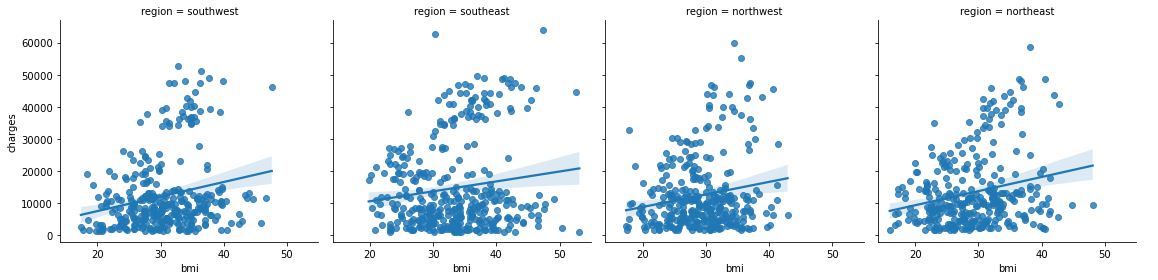

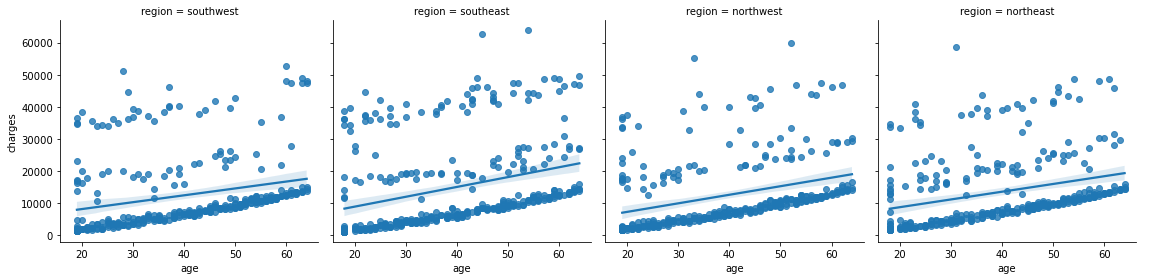

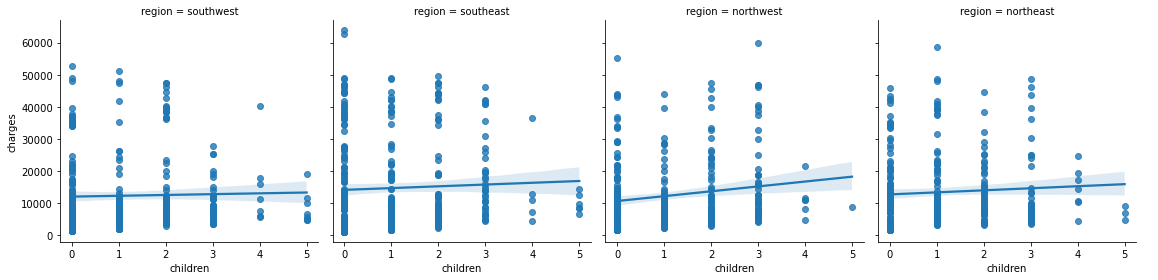

In [21]:
g1 = sns.FacetGrid(data, col="region", height=4)
g2 = sns.FacetGrid(data, col="region", height=4)
g3 = sns.FacetGrid(data, col ='region', height=4)

g1.map(sns.regplot, "bmi", "charges")
g2.map(sns.regplot, "age", "charges")
g3.map(sns.regplot, "children", "charges")
g1.add_legend()
g2.add_legend()
g3.add_legend()
plt.show()

The slope for the charges vs children varies little bit, need to explore with hypothesis whether region effects charges are not


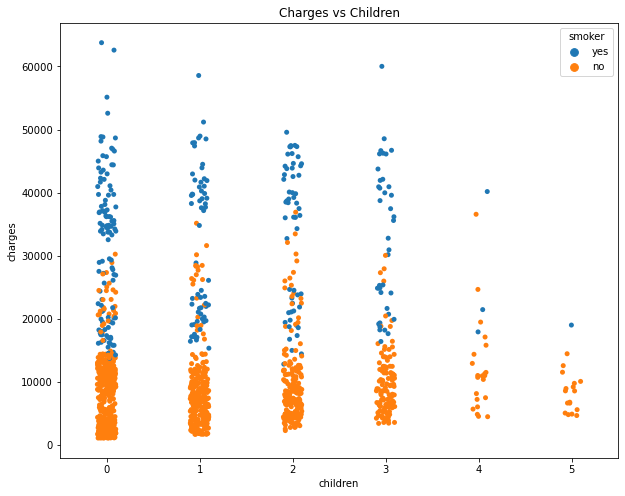

In [27]:
plt.figure(figsize=(10,8))
plt.title('Charges vs Children')
sns.stripplot(x=data['children'],y= data['charges'], hue= data['smoker'])
plt.show()

From the above plot we can see very strange facts if the number of children increases than medical charges decreases.

From the plots non smoker category likely to pay less charges, however there are cases also where non smoker person also pay
high charges

In [97]:
median_bmi = data['bmi'].median()
median_age = data['age'].median()
print('mean charges with where bmi is greater than median bmi, smoker is yes and age is greater than median age =',
      data[(data['bmi']>=median_bmi) & (data['smoker']=='yes') & (data['age']> median_age)]['charges'].mean())


print('mean charges with where bmi is greater than median bmi, smoker is no and age is greater than median age =',
      data[(data['bmi']>=median_bmi) & (data['smoker']=='no') & (data['age']>= median_age)]['charges'].mean())


print('mean charges with where bmi is greater than median bmi, smoker is yes and age is less than or equal to median age =',
      data[(data['bmi']>=median_bmi) & (data['smoker']=='yes') & (data['age']<= median_age)]['charges'].mean())


print('mean charges with where bmi is greater than median bmi, smoker is no and age is less than or equal to median age =',
      data[(data['bmi']<median_bmi) & (data['smoker']=='no') & (data['age']<= median_age)]['charges'].mean())

mean charges with where bmi is greater than median bmi, smoker is yes and age is greater than median age = 45140.26464235293
mean charges with where bmi is greater than median bmi, smoker is no and age is greater than median age = 11788.104648250815
mean charges with where bmi is greater than median bmi, smoker is yes and age is less than or equal to median age = 38413.35228014285
mean charges with where bmi is greater than median bmi, smoker is no and age is less than or equal to median age = 5092.135771130588


From above it is clear that the charges are increases with age, bmi and smoker category

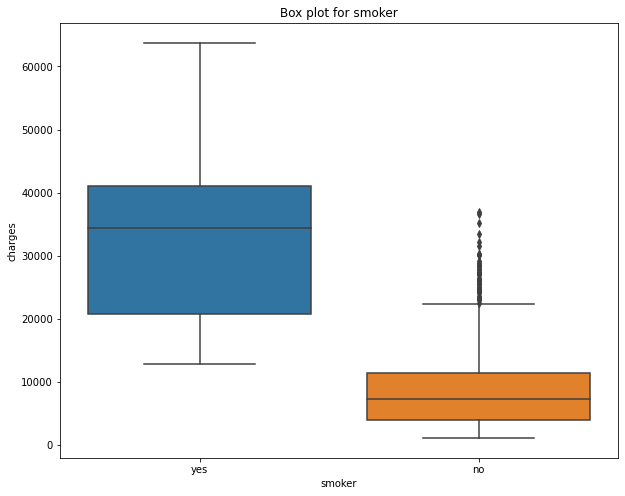

In [100]:
plt.figure(figsize = (10,8))
plt.title('Box plot for smoker')
sns.boxplot(x=data['smoker'],y=data['charges'])
plt.show()

The above plot clearly mentioned that charges for yes is higher , however there are outliers in the no category which are not
smoker but pay high medical charges

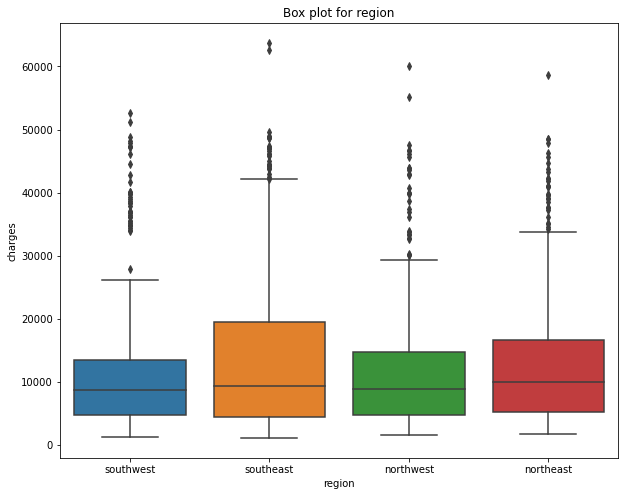

In [101]:
plt.figure(figsize = (10,8))
plt.title('Box plot for region')
sns.boxplot(x=data['region'],y=data['charges'])
plt.show()

The region wise there is not much difference , outliers are present in each region , the south east region have high humber
that are likely pay high medical charges. This is a interesting region , the medical firm can research in the south east region
and find why the medical expense is high, it is potential region to which can be used excessively to earn benefit by the firm

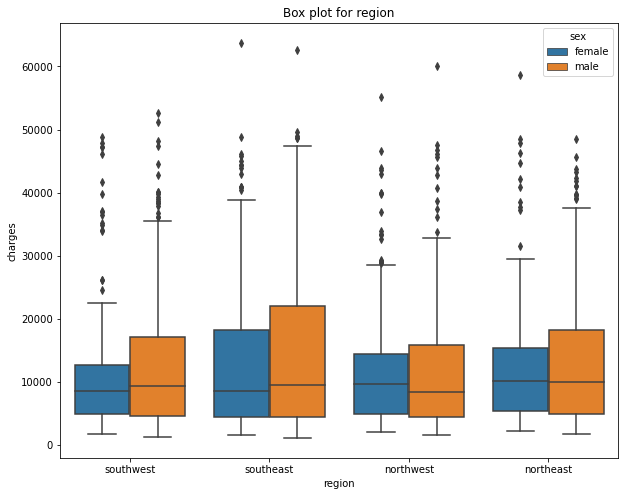

In [104]:
plt.figure(figsize = (10,8))
plt.title('Box plot for region gender')
sns.boxplot(x=data['region'],y=data['charges'], hue=data['sex'])
plt.show()

The region northwes tis interestingly is the region where median medical charges for female is high compare to male otherwise
in all other region medical charges for the male is high or almost same as female

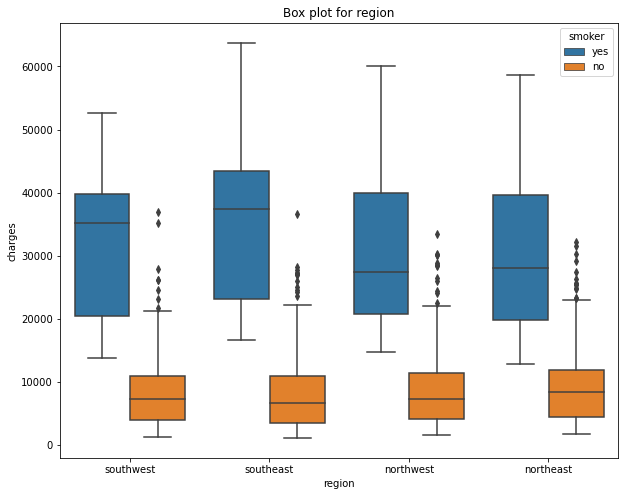

In [105]:
plt.figure(figsize = (10,8))
plt.title('Box plot for region with smoker ')
sns.boxplot(x=data['region'],y=data['charges'], hue=data['smoker'])
plt.show()

We have clearly seen that the medical charges for the smoker category is very high, the graph clearly explain that. This fact is
invariant to the region

<AxesSubplot:title={'center':'Heatmap for te correlation'}>

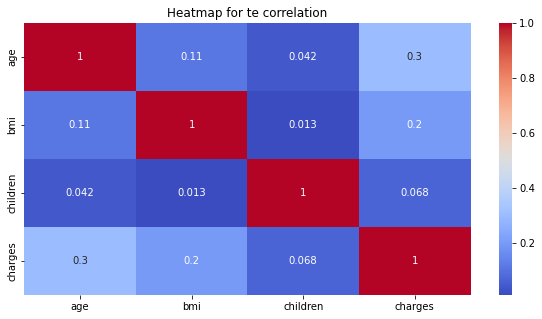

In [111]:
plt.figure(figsize =(10,5))
plt.title("Heatmap for te correlation")
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

There is a correlation between the charges and age, charges and bmi. 

The multicollinearity in the data almost neglibile. 

The strength of correlation between target and independent variables appear weak, how much significant it is, it will be
discovered further with the hypothesis test like pearson correlation or spearman correlation test

# Hypothesis testing

In [47]:
# charges vs numerical 

In [48]:
stats.shapiro(data['charges']) 
# fails shapiro test , charges

ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)

The charges does not follow normal distribution as p value is less than level of significance 0.05

In [50]:
stats.shapiro(np.log(data['charges']))

ShapiroResult(statistic=0.9831657409667969, pvalue=2.2936005525386882e-11)

In [52]:
a[0]

array([12.12897974,  8.80859638, 10.14752106, ...,  8.72968299,
        9.01913128, 12.9736611 ])

In [114]:
# normality test for the numerical columns
for col in data.select_dtypes(exclude= object):
    print('for',col,stats.shapiro(data[col])) # no normal 

for age ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
for bmi ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)
for children ShapiroResult(statistic=0.8231803774833679, pvalue=5.066361280494088e-36)
for charges ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)


age, bmi , children and charges do not follow normal distribution

For further hypothesis now we will need to go for the non parametric test

In [54]:
# non parametric test spearman correlation for age, bmi and number of children with target (medical charges)
for col in data.drop('charges',axis =1).select_dtypes(exclude= object):
    print(col,stats.spearmanr(data[col],data['charges'])) # significant  all three 
    

age SpearmanrResult(correlation=0.5343921337718459, pvalue=1.130692027803638e-99)
bmi SpearmanrResult(correlation=0.11939590358331145, pvalue=1.1926059544526874e-05)
children SpearmanrResult(correlation=0.13333894319168216, pvalue=9.846806132997295e-07)


From above spearman corrleation test we find the p value is less than 0.05, reject null hypothesis , it concludes
age, bmi and number of children significant corrleated with  charges

In [55]:
# finding significance of region, sex and smoker

In [118]:
# non parametric kruskal test for the gender
stats.kruskal( data[data['sex']=='male']['charges'],
              data[data['sex']=='male']['charges'])
# 


KruskalResult(statistic=0.0, pvalue=1.0)

p value is very high than 0.05, fails to reject null hypothesis, it means gender does not impacts charges

In [116]:
# non parametric kruskal
stats.kruskal( data[data['smoker']=='yes']['charges'],
              data[data['smoker']=='no']['charges'])
# does impacts 


KruskalResult(statistic=588.5196583657973, pvalue=5.259018267498522e-130)

p value for the smoker is very less than 0.05, reject nulll hypotheis , meaning it effects the charges

In [119]:
# non parametric kruskal
stats.kruskal( data[data['region']=='southwest']['charges'],
              data[data['region']=='southeast']['charges'],
              data[data['region']=='northwest']['charges'],
              data[data['region']=='northeast']['charges'],)
# does not impacts 


KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

above p value is greater than 0.05, meaning region does not effects charges

From above test it was found that significant feature that impacts target variables (charges)
  age, bmi, smoker, children

# Modeling 

In [121]:
def Transformation(dataFrame , cat_col , num_col, scaling_method = StandardScaler() 
                   , categorical_encoding = OneHotEncoder(sparse=False)):
    # defualt scaling method StandardScaler
    # numerical transformation
    scaler  = scaling_method
    X_num = scaler.fit_transform(dataFrame[num_col])
    df_num = pd.DataFrame(X_num, columns = scaler.get_feature_names_out())
    
    # categorical data Transformation 
    CategoricalEncoder = categorical_encoding
    X_cat = CategoricalEncoder.fit_transform(dataFrame[cat_col])
    df_cat = pd.DataFrame(X_cat, columns = CategoricalEncoder.get_feature_names_out())
    
    df_merge = pd.merge(df_num,df_cat,left_index=True, right_index=True)
    
    del scaler, CategoricalEncoder, X_num, X_cat; # deleting garbage variables
    return df_merge # returning data frame 

In [122]:
cat_col = ['smoker','region','sex']
num_col = ['age','bmi','children']
    # applying transformation function 
X = Transformation(dataFrame=data,cat_col = cat_col, num_col= num_col)
y =  data['charges']
X = sm.add_constant(X) # adding constant for stats model 
X.head()

,const,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,1.0,-1.438764,-0.453320,-0.908614,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,-1.509965,0.509621,-0.078767,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,-0.797954,0.383307,1.580926,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,-0.441948,-1.305531,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,-0.513149,-0.292556,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42) # splitting with 0.33 

In [124]:
y = np.array(y) # fitting logistic regression model with OLS method
mod = sm.OLS(y_train, X_train)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     325.0
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.33e-257
Time:                        22:52:34   Log-Likelihood:                -9081.7
No. Observations:                 896   AIC:                         1.818e+04
Df Residuals:                     887   BIC:                         1.822e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9014.6170    112.180     80.359      0.000    8794.448    9234.786
age               3673.6520    204.905     17.929      0.000    3271.496    4075.808
bmi               2115.8730    219.229      9.651      0.000    1685.606    2546.140
children           447.9891    205.872      2.176      0.030      43.937     852.041
smoker_no        -7343.1831    224.624    -32.691      0.000   -7784.039   -6902.328
smoker_yes        1.636e+04    288.882     56.624      0.000    1.58e+04    1.69e+04
region_northeast  2761.1550    357.503      7.723      0.000    2059.504    3462.806
region_northwest  2421.5366    359.861      6.729      0.000    1715.258    3127.815
region_southeast  1874.6554    365.013      5.136      0.000    1158.266    2591.045
region_southwest  1957.2702    364.683      5.367      0.000    1241.527    2673.013
sex_female        4446.7467    215.324     20.651      0.000    4024.143    4869.351
sex_male          4567.8704    210.775     21.672      0.000    4154.195    4981.546
==============================================================================
Omnibus:                      218.301   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.473
Skew:                           1.273   Prob(JB):                    9.69e-119
Kurtosis:                       5.843   Cond. No.                     2.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From above t test all variables appear significant in the  linear regression 

### Improving the model while suing only significant variables that selected after kruskal and spearman

In [126]:
y = np.array(y) # improving the logistic regression models
# removing the region and sex from the model as there are insignificant for the model from Kruskal wal's test 
mod = sm.OLS(y_train, X_train.drop(columns = ['sex_female','sex_male','region_northeast',
                    'region_northwest','region_southeast','region_southwest'],axis =1))
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     649.9
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          2.13e-262
Time:                        22:53:53   Log-Likelihood:                -9083.2
No. Observations:                 896   AIC:                         1.818e+04
Df Residuals:                     891   BIC:                         1.820e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.353e+04    167.864     80.573      0.000    1.32e+04    1.39e+04
age         3684.0762    204.534     18.012      0.000    3282.652    4085.500
bmi         2022.3040    210.069      9.627      0.000    1610.016    2434.592
children     456.7405    205.569      2.222      0.027      53.285     860.196
smoker_no  -5087.1391    214.457    -23.721      0.000   -5508.039   -4666.239
smoker_yes  1.861e+04    308.498     60.333      0.000     1.8e+04    1.92e+04
==============================================================================
Omnibus:                      217.332   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.570
Skew:                           1.271   Prob(JB):                    3.06e-117
Kurtosis:                       5.813   Cond. No.                     3.62e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The improved model high r squre value and F statistics, which means the model has been improved

In [127]:
significant_col = ['const','age','bmi','children','smoker_no','smoker_yes']
print('test rscore', metrics.r2_score(y_test,result.predict(X_test[significant_col])))
print('train rscore', metrics.r2_score(y_train,result.predict(X_train[significant_col])))
      

print('test mean squared error', metrics.mean_squared_error(y_test,result.predict(X_test[significant_col])))
print('train mean squared error', metrics.mean_squared_error(y_train,result.predict(X_train[significant_col])))

test rscore 0.7591192126340146
train rscore 0.7447453318954776
test mean squared error 35299792.100293264
train mean squared error 37396262.076139495


# Model evaluation

In [128]:
significant_col = ['const','age','bmi','children','smoker_no','smoker_yes'] # sig
print('test rscore', metrics.r2_score(y_test,result.predict(X_test[significant_col])))
print('train rscore', metrics.r2_score(y_train,result.predict(X_train[significant_col])))


print('test mean squared error', metrics.mean_absolute_percentage_error(y_test,result.predict(X_test[significant_col])))
print('train mean squared error', metrics.mean_absolute_percentage_error(y_train,result.predict(X_train[significant_col])))

test rscore 0.7591192126340146
train rscore 0.7447453318954776
test mean squared error 0.4411509492369083
train mean squared error 0.42835788749932086


In [129]:
# apply
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X[num_col].values, i) for i in range(X[num_col].shape[1])]

# create a column of variable names
vif["Features"] = X[num_col].columns

# sort the dataframe based on the values of VIF_Factor in descending order
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1.013816,age
1,1.012152,bmi
2,1.001874,children


THe multi collinearity does not exists as there are no high value in the VIF score

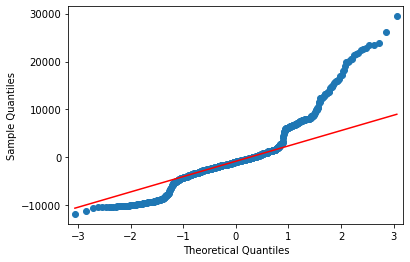

In [132]:
sm.qqplot(result.resid, line ='q')
plt.show()

In [133]:
model = LinearRegression()
model.fit(X_train[significant_col], y_train)
significant_col = ['const','age','bmi','children','smoker_no','smoker_yes']
print('test rscore', metrics.r2_score(y_test,model.predict(X_test[significant_col])))
print('train rscore', metrics.r2_score(y_train,model.predict(X_train[significant_col])))


print('test mean squared error', metrics.mean_squared_error(y_test,model.predict(X_test[significant_col])))
print('train mean squared error', metrics.mean_squared_error(y_train,model.predict(X_train[significant_col])))

test rscore 0.7591192126340146
train rscore 0.7447453318954776
test mean squared error 35299792.10029327
train mean squared error 37396262.076139495


In [134]:
# Appling differenc model 

In [135]:
from xgboost import XGBRegressor

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [136]:
model_list = list_models = [('linear',LinearRegression()),
              ("Lasso",Lasso()),
              ('Ridge',Ridge()),
               ('Decision Tree', DecisionTreeRegressor())  ,          
              ('Elastic net',ElasticNet()),
              ('Gradient',GradientBoostingRegressor()),
              ('Ada',AdaBoostRegressor()),
               ("Random",RandomForestRegressor()),
              ('SVR',SVR()),
              ('KNN', KNeighborsRegressor()),
                 ('XGBoost',XGBRegressor()) ]          

In [137]:
significant_col = ['const','age','bmi','children','smoker_no','smoker_yes']
def ModelEvaluation(model_list,  significant_col,X_train, y_train, X_test, y_test):
    for element in model_list:
        print('='*20)
        print(f'model name = {element[0]}')
        model = element[1]
        model.fit(X_train[significant_col], y_train)

        print('test rscore', metrics.r2_score(y_test,model.predict(X_test[significant_col])))
        print('train rscore', metrics.r2_score(y_train,model.predict(X_train[significant_col])))


        print('test mean squared error', metrics.mean_squared_error(y_test,model.predict(X_test[significant_col])))
        print('train mean squared error', metrics.mean_squared_error(y_train,model.predict(X_train[significant_col])))



In [138]:
ModelEvaluation(model_list, significant_col, X_train, y_train, X_test, y_test)

model name = linear
test rscore 0.7591192126340146
train rscore 0.7447453318954776
test mean squared error 35299792.10029327
train mean squared error 37396262.076139495
model name = Lasso
test rscore 0.7591155972858686
train rscore 0.7447452712104217
test mean squared error 35300321.91024332
train mean squared error 37396270.96684567
model name = Ridge
test rscore 0.7590732763148694
train rscore 0.7447379205943765
test mean squared error 35306523.82237625
train mean squared error 37397347.87394434
model name = Decision Tree
test rscore 0.7268514799652064
train rscore 0.9999963365369599
test mean squared error 40028455.881295234
train mean squared error 536.7181919642856
model name = Elastic net
test rscore 0.5118099399501058
train rscore 0.5017993257397474
test mean squared error 71541644.3695352
train mean squared error 72989235.10192887
model name = Gradient
test rscore 0.8581140426417478
train rscore 0.9067838187693456
test mean squared error 20792628.799770474
train mean squared er

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



test rscore 0.8128646134536421
train rscore 0.9948170023093038
test mean squared error 27423690.830343317
train mean squared error 759338.6691832452


In [139]:
# finding robust model based on coefficiant of variation 
def ModelEval_based_Coefvariation(model_list,  significant_col,X, y):
    
    for element in model_list:
        print('='*20)
        print(f'model name = {element[0]}')

        model = element[1]
        model.fit(X_train[significant_col], y_train)
        score = cross_validate(model,X[significant_col], y,cv=10, scoring='r2')
        print('R2 score coef variation',stats.variation(score['test_score']))


In [140]:
ModelEval_based_Coefvariation(model_list, significant_col, X,y) # finding coefficient of variation

model name = linear
R2 score coef variation 0.056860406734476406
model name = Lasso
R2 score coef variation 0.05682215704473018
model name = Ridge
R2 score coef variation 0.05659047142599893
model name = Decision Tree
R2 score coef variation 0.12160466744241827
model name = Elastic net
R2 score coef variation 0.030529170719063598
model name = Gradient
R2 score coef variation 0.05174269718360298
model name = Ada
R2 score coef variation 0.04017939606397929
model name = Random
R2 score coef variation 0.05241674219910134
model name = SVR
R2 score coef variation -0.3037036643906268
model name = KNN
R2 score coef variation 0.05115633498872187
model name = XGBoost


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be 

R2 score coef variation 0.06975995157218179


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



# Tuning the KNN models

In [142]:
model = KNeighborsRegressor()
model.fit(X_train[significant_col], y_train)

print('test rscore', metrics.r2_score(y_test,model.predict(X_test[significant_col])))
print('train rscore', metrics.r2_score(y_train,model.predict(X_train[significant_col])))


print('test mean squared error', metrics.mean_squared_error(y_test,model.predict(X_test[significant_col])))
print('train mean squared error', metrics.mean_squared_error(y_train,model.predict(X_train[significant_col])))


test rscore 0.8367321781826077
train rscore 0.8698955027967277
test mean squared error 23926026.769686274
train mean squared error 19061049.542512666


In [143]:
# tuning with grid search


model = KNeighborsRegressor(n_jobs=-1)
param = {'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['minkowski','euclidean','chebyshev'],
        'n_neighbors': np.arange(5,20,2),
        'p':[1,2,3,4,5]}
grid = GridSearchCV(estimator=model,param_grid=param, cv= 5, scoring ='r2',n_jobs=-1)
grid.fit(X_train[significant_col], y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'chebyshev'],
                         'n_neighbors': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'p': [1, 2, 3, 4, 5]},
             scoring='r2')

In [144]:
grid.best_params_

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 13, 'p': 1}

In [145]:
grid.score(X_test[significant_col], y_test)

0.8510163426808686

In [146]:
model = KNeighborsRegressor(n_neighbors=13, algorithm='auto', metric='minkowski',p =1)
model.fit(X_train[significant_col], y_train)

print('test rscore', metrics.r2_score(y_test,model.predict(X_test[significant_col])))
print('train rscore', metrics.r2_score(y_train,model.predict(X_train[significant_col])))


print('test mean squared error', metrics.mean_squared_error(y_test,model.predict(X_test[significant_col])))
print('train mean squared error', metrics.mean_squared_error(y_train,model.predict(X_train[significant_col])))


test rscore 0.8510163426808686
train rscore 0.8486492187511776
test mean squared error 21832758.798302192
train mean squared error 22173751.113110967


The tuned model has increased accuracy around 1%

# Tuning Random Forest

In [147]:
# random forest
model = RandomForestRegressor()
model.fit(X_train[significant_col], y_train)

print('test rscore', metrics.r2_score(y_test,model.predict(X_test[significant_col])))
print('train rscore', metrics.r2_score(y_train,model.predict(X_train[significant_col])))


print('test mean squared error', metrics.mean_squared_error(y_test,model.predict(X_test[significant_col])))
print('train mean squared error', metrics.mean_squared_error(y_train,model.predict(X_train[significant_col])))


test rscore 0.8349256075076092
train rscore 0.9751582106559612
test mean squared error 24190770.047634132
train mean squared error 3639463.5665174937


In [148]:
# tuning with grid search
model = RandomForestRegressor()
param = {"n_estimators":[50,100,150,200], 'max_depth':[None, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    'min_samples_split':[3,3,4,5,6,7,8,9]}
grid = GridSearchCV(estimator=model,param_grid=param, cv= 5, scoring ='r2',n_jobs=-1)
grid.fit(X_train[significant_col], y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16],
                         'min_samples_split': [3, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [149]:
grid.best_params_

{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 50}

In [150]:
grid.score(X_test[significant_col], y_test)

0.8563502295841621

In [151]:
# random forest
significant_col =
model = RandomForestRegressor(n_estimators=50, max_depth=4, min_samples_split=8)
model.fit(X_train[significant_col], y_train)

print('test rscore', metrics.r2_score(y_test,model.predict(X_test[significant_col])))
print('train rscore', metrics.r2_score(y_train,model.predict(X_train[significant_col])))


print('test mean squared error', metrics.mean_squared_error(y_test,model.predict(X_test[significant_col])))
print('train mean squared error', metrics.mean_squared_error(y_train,model.predict(X_train[significant_col])))


test rscore 0.8573945603618833
train rscore 0.8769957890160429
test mean squared error 20898065.082907796
train mean squared error 18020817.188507732


In [200]:
array1 =model.feature_importances_

array([0.        , 0.12417812, 0.17389628, 0.00774045, 0.45755025,
       0.2366349 ])

In [203]:
df_importan_feature = pd.DataFrame(list(model.feature_importances_),index= list(model.feature_names_in_),columns=['values'])
df_importan_feature.sort_values(by='values',ascending=False)

,values
smoker_no,0.457550
smoker_yes,0.236635
bmi,0.173896
age,0.124178
children,0.007740
const,0.000000


From above it is clear that for random forest most important feature to decide medical charge is smoker category


The second important feature is bmi and age

Number of children is least important category

we can ignore constant as it has been added for the statistical modeling, however it is not required in random forest

# Final model

### we select the random forest model as final model because it shows highes r2 score in the test data set

In [184]:
def UserInput():
    significant_col = ['const', 'age', 'bmi', 'children', 'smoker_no', 'smoker_yes']
    age = input("Please enter the age= ")
    bmi = input("Please enter the bmi= ")
    children = input("Please enter the number children= ")
    smoker = input('Please entet the smoker 1 for yes else no= ')
    age = int(age)
    bmi = int(age)
    children = int(children)
    smoker = int(smoker)
    if smoker == 1:
        smoker_yes = 1
        smoker_no =0
    elif smoker ==0:
        smoker_yes =0
        smoker_no =1
    else:
        print('Need correction')
    user_input = np.array([[1,age, bmi, children, smoker_no,smoker_yes]])
    user_df = pd.DataFrame(user_input,columns=significant_col)
    return user_df
    

In [187]:
val = UserInput() # demo
predicted_val = model.predict(val)  # prediction 
print('Predicted charges', round( predicted_val[0],ndigits=2))

Please enter the age= 40
Please enter the bmi= 30
Please enter the number children= 1
Please entet the smoker 1 for yes else no= 0
Predicted charges 16482.66


# Conclusion

After hypothesis test we find the significant features namely age , smoker, number of children and bmi
assists well to predict medical charges

Random forest model as well KNN works well for the predictive modelling

